In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import neptune.new as neptune

In [13]:
def clean_neptune_log(it, val):
    val_dict = {}
    for i, v in zip(it, val):
        val_dict[i] = v
    clean_it = list(val_dict.keys())
    clean_it.sort()
    clean_val = [val_dict[i] for i in clean_it]
    return clean_it, clean_val

In [51]:
run_ids = [f'VID-{k}' for k in range(28, 64) if k not in {44, 46, 52, 57}]

run_df_list = []

for run_id in run_ids:
    run = neptune.init(
        api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0YzBlMThhNS05MzI0LTRhZDEtODIzYy02ZDg0YWMzMzgwNDIifQ==',
        project='cellarium/CELLMINCER',
        run=run_id,
        mode='read-only')
    
    metrics_it = run['metrics/iter'].fetch_values()['value'].to_numpy()
    psnr_mean = run['metrics/0/psnr/mean'].fetch_values()['value'].to_numpy()
    metrics_it_clean, psnr_mean_clean = clean_neptune_log(metrics_it, psnr_mean)
    run_df_list.append(pd.DataFrame([[
            run['config/train/n_iters'].fetch(),
            run['config/train/optim_params/type'].fetch(),
            run['config/train/lr_params/max'].fetch(),
            run['config/train/lr_params/warmup'].fetch(),
            run['config/model/use_layer_norm'].fetch(),
            metrics_it_clean,
            psnr_mean_clean]],
        columns = ['n_iters', 'optim_type', 'lr', 'warmup', 'batch_norm', 'metrics_it', 'psnr_mean']
    ))

run_df = pd.concat(run_df_list).reset_index(drop=True)

https://app.neptune.ai/cellarium/CELLMINCER/e/VID-28
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-29
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-30
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-31
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-32
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-33
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-34
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-35
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-36
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-37
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-38
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-39
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-40
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-41
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-42
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-43
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-45
https://app.neptune.ai/cellarium/CELLMINCER/e/VID-47
https://app.neptune.ai/cellarium/CELLMINCER/e/

In [52]:
display(run_df[(run_df['n_iters'] == 50000) & (run_df['optim_type'] == 'adam')])

,n_iters,optim_type,lr,warmup,batch_norm,metrics_it,psnr_mean
0,50000,adam,0.0010,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.09101252744699, 90.86073274099991, 90.3168..."
1,50000,adam,0.0010,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[87.98554801949844, 88.33290799696678, 90.4001..."
2,50000,adam,0.0001,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.42959202269701, 90.37278244454332, 89.6275..."
3,50000,adam,0.0001,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[82.95851077194652, 83.18890314763775, 88.4410..."
4,50000,adam,0.0010,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.3071326002639, 88.65159944029486, 91.33771..."
5,50000,adam,0.0010,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[90.87862572222397, 90.48413938748527, 91.5189..."
6,50000,adam,0.0001,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[85.76280141645388, 89.71023344310268, 90.7020..."
7,50000,adam,0.0001,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[90.79153479040711, 91.28366561327023, 91.7293..."


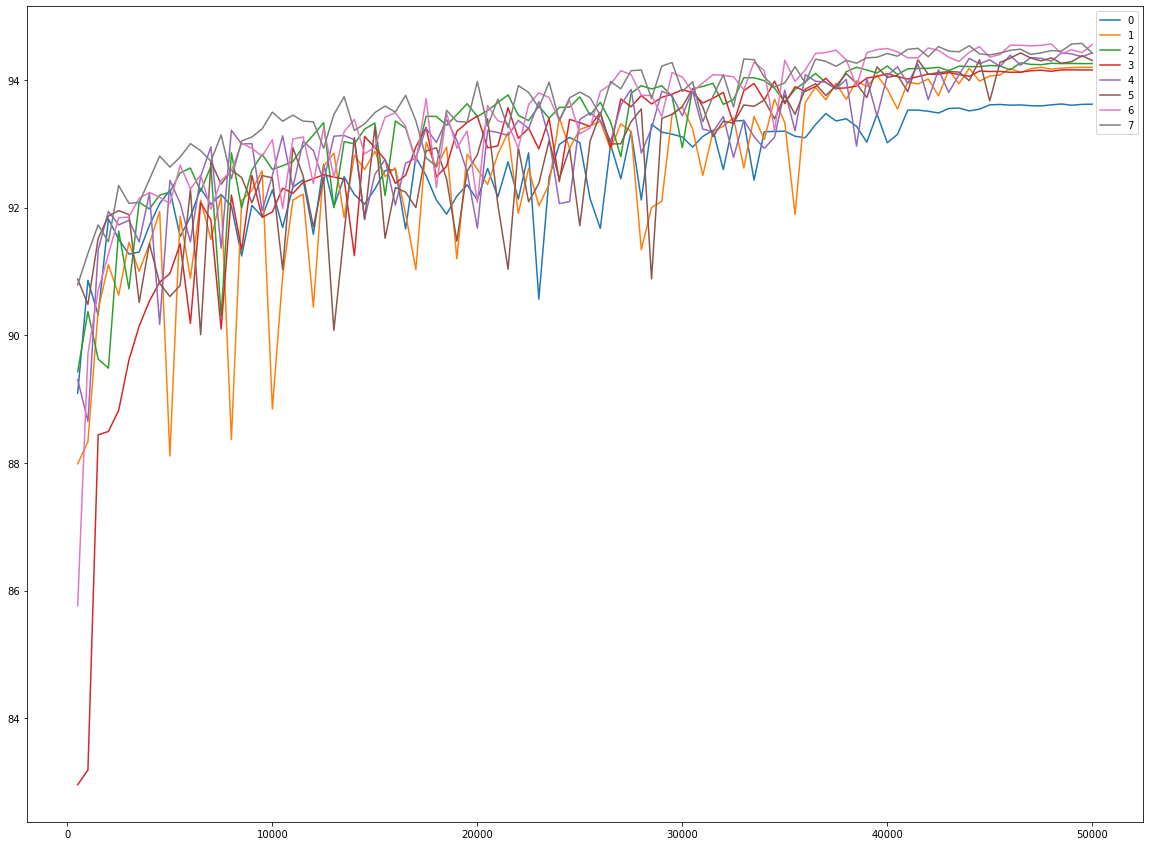

In [73]:
adam_50000 = run_df[(run_df['n_iters'] == 50000) & (run_df['optim_type'] == 'adam')][['metrics_it', 'psnr_mean']]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 15))
for idx, row in adam_50000.iterrows():
    plt.plot(row['metrics_it'], row['psnr_mean'], label=str(idx))
plt.legend()
plt.show()

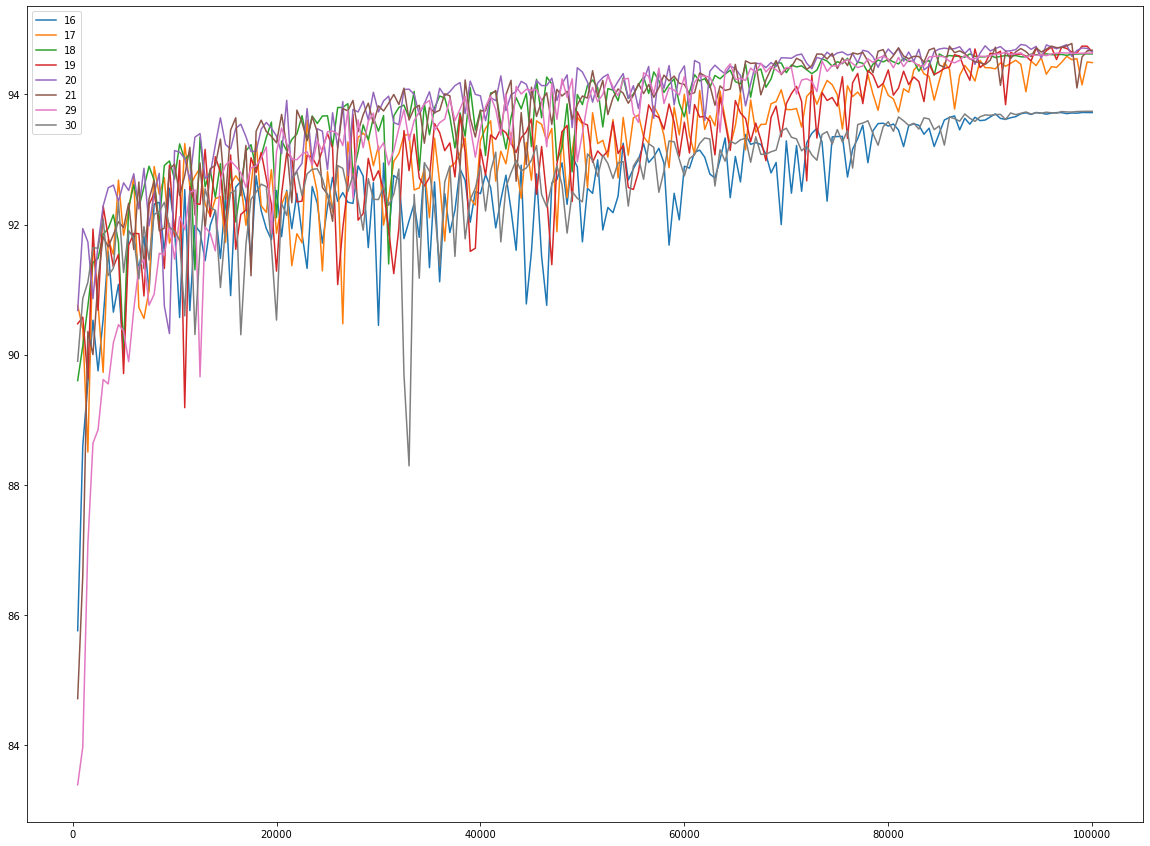

In [72]:
adam_100000 = run_df[(run_df['n_iters'] == 100000) & (run_df['optim_type'] == 'adam')][['metrics_it', 'psnr_mean']]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 15))
for idx, row in adam_100000.iterrows():
    plt.plot(row['metrics_it'], row['psnr_mean'], label=str(idx))
plt.legend()
plt.show()

In [61]:
display(run_df[(run_df['n_iters'] == 50000) & (run_df['optim_type'] == 'sgd')])

,n_iters,optim_type,lr,warmup,batch_norm,metrics_it,psnr_mean
8,50000,sgd,0.0010,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.51093839444682, 83.53632152671847, 83.6170..."
9,50000,sgd,0.0010,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.39984518678345, 83.58736717641062, 83.5759..."
10,50000,sgd,0.0001,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.39698341832766, 84.2225828923261, 83.98237..."
11,50000,sgd,0.0010,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.67693270477348, 83.46495301664505, 83.8371..."
12,50000,sgd,0.0001,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.04106211150672, 83.59397394457413, 83.4360..."
13,50000,sgd,0.0010,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.9139740194078, 83.68063440398483, 83.59795..."
14,50000,sgd,0.0001,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.64987595709748, 83.50217421375925, 83.5081..."
15,50000,sgd,0.0001,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[80.97180980852471, 82.23732742717442, 83.9725..."


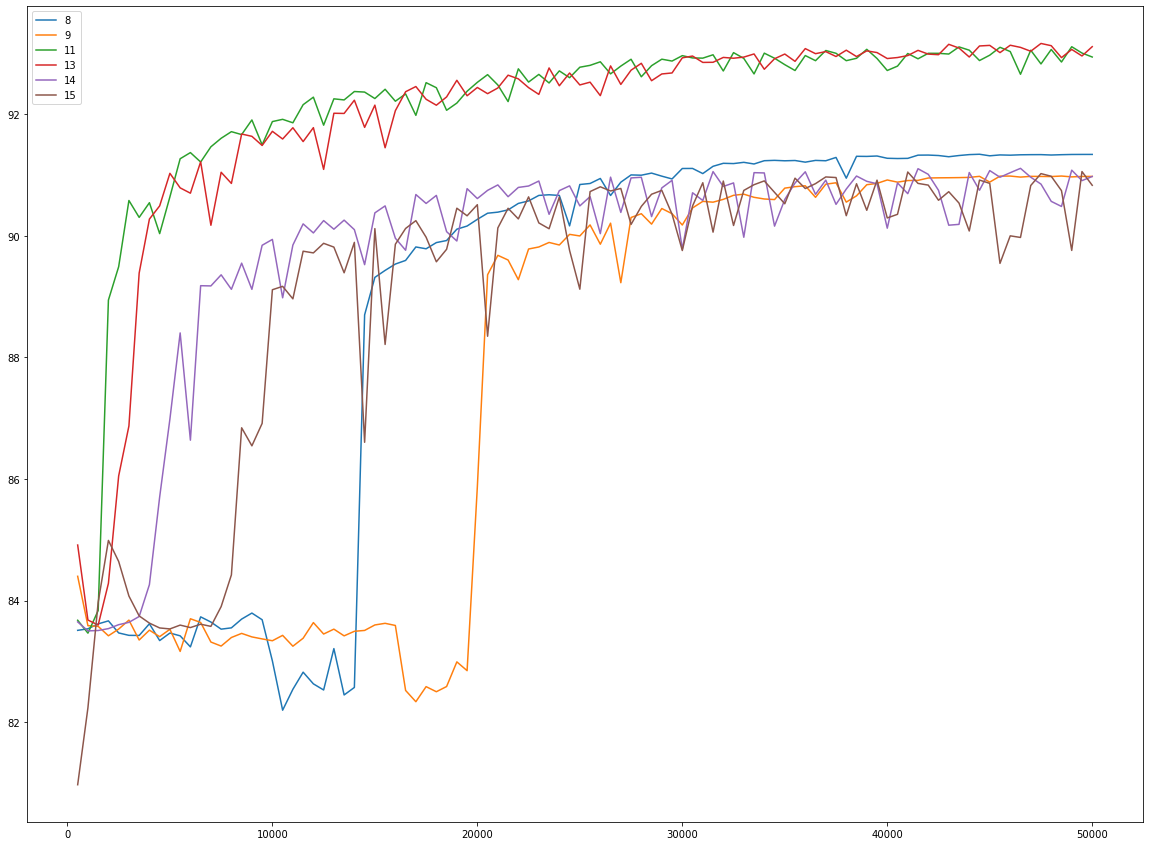

In [74]:
sgd_50000 = run_df[(run_df['n_iters'] == 50000) & (run_df['optim_type'] == 'sgd')][['metrics_it', 'psnr_mean']]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 15))
for idx, row in sgd_50000.iterrows():
#     if idx in (10, 12):
    plt.plot(row['metrics_it'], row['psnr_mean'], label=str(idx))
plt.legend()
plt.show()

In [68]:
display(run_df[(run_df['n_iters'] == 100000) & (run_df['optim_type'] == 'sgd')])

,n_iters,optim_type,lr,warmup,batch_norm,metrics_it,psnr_mean
22,100000,sgd,0.0001,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.6474604064643, 83.8005417729338, 83.609648..."
23,100000,sgd,0.0010,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[80.41540795493377, 82.43143665605787, 83.3787..."
24,100000,sgd,0.0010,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.67745592848658, 88.16439091103166, 89.7677..."
25,100000,sgd,0.0001,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[81.79983486847506, 81.95424223461006, 82.2052..."
26,100000,sgd,0.0001,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[82.2325761351291, 82.85247073738438, 83.77233..."
27,100000,sgd,0.0001,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.79842038036506, 83.61239870299983, 83.6837..."
28,100000,sgd,0.0010,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.49634562023856, 83.50295709277303, 83.5463..."
31,100000,sgd,0.0010,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[82.73794975897539, 83.23507632355633, 83.3983..."


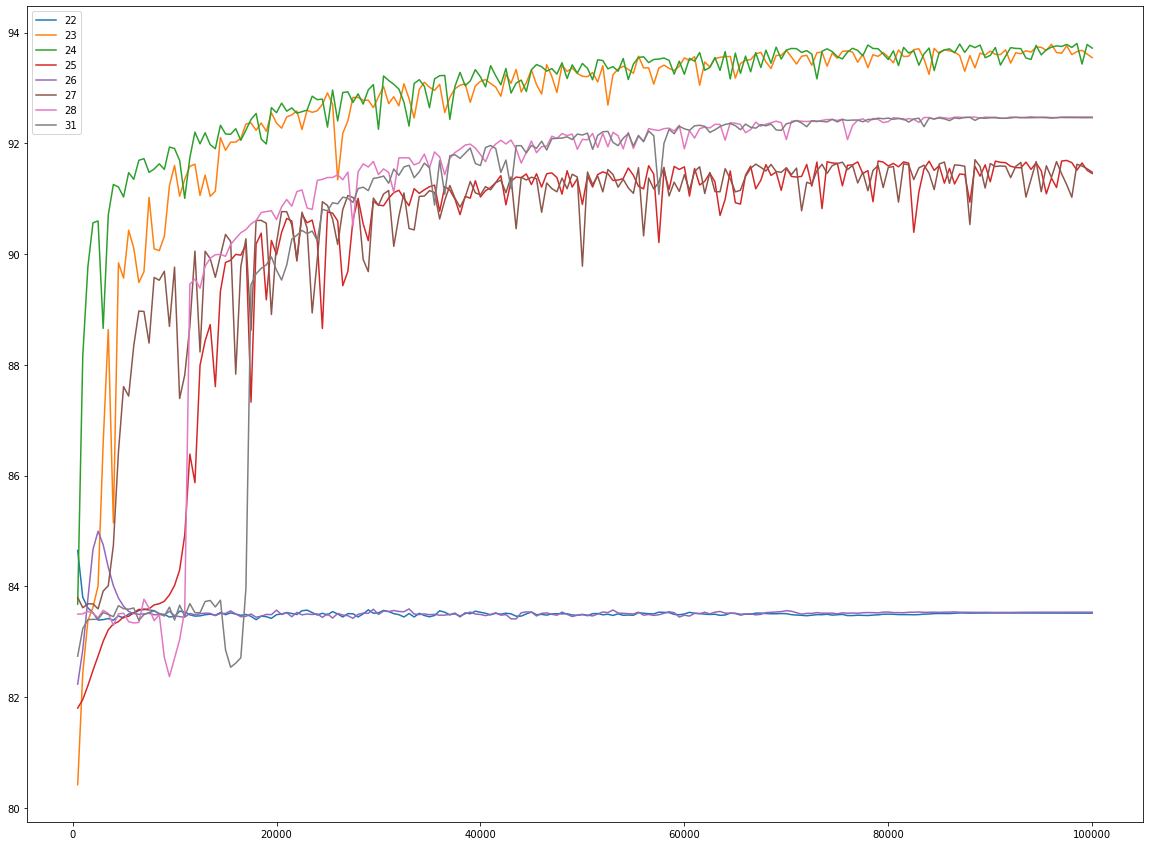

In [76]:
sgd_100000 = run_df[(run_df['n_iters'] == 100000) & (run_df['optim_type'] == 'sgd')][['metrics_it', 'psnr_mean']]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(20, 15))
for idx, row in sgd_100000.iterrows():
#     if idx in (22, 26):
    plt.plot(row['metrics_it'], row['psnr_mean'], label=str(idx))
plt.legend()
plt.show()

In [79]:
psnr_last = []
for idx, row in run_df.iterrows():
    psnr_last.append(row['psnr_mean'][-1])

run_df['psnr_last'] = psnr_last
run_df

,n_iters,optim_type,lr,warmup,batch_norm,metrics_it,psnr_mean,psnr_last
0,50000,adam,0.0010,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.09101252744699, 90.86073274099991, 90.3168...",93.621098
1,50000,adam,0.0010,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[87.98554801949844, 88.33290799696678, 90.4001...",94.199600
2,50000,adam,0.0001,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.42959202269701, 90.37278244454332, 89.6275...",94.256360
3,50000,adam,0.0001,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[82.95851077194652, 83.18890314763775, 88.4410...",94.157112
4,50000,adam,0.0010,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[89.3071326002639, 88.65159944029486, 91.33771...",94.424926
5,50000,adam,0.0010,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[90.87862572222397, 90.48413938748527, 91.5189...",94.305378
6,50000,adam,0.0001,0.1,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[85.76280141645388, 89.71023344310268, 90.7020...",94.552363
7,50000,adam,0.0001,0.0,True,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[90.79153479040711, 91.28366561327023, 91.7293...",94.423028
8,50000,sgd,0.0010,0.0,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[83.51093839444682, 83.53632152671847, 83.6170...",91.338154
9,50000,sgd,0.0010,0.1,False,"[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0...","[84.39984518678345, 83.58736717641062, 83.5759...",90.976465


In [81]:
run_df[['n_iters', 'optim_type', 'lr', 'warmup', 'batch_norm', 'psnr_last']].sort_values('psnr_last', ascending=False)

,n_iters,optim_type,lr,warmup,batch_norm,psnr_last
21,100000,adam,0.0001,0.1,True,94.679383
20,100000,adam,0.0001,0.0,True,94.657500
19,100000,adam,0.0010,0.1,True,94.653823
29,100000,adam,0.0001,0.1,False,94.634727
18,100000,adam,0.0001,0.0,False,94.621947
6,50000,adam,0.0001,0.1,True,94.552363
17,100000,adam,0.0010,0.0,True,94.488293
4,50000,adam,0.0010,0.0,True,94.424926
7,50000,adam,0.0001,0.0,True,94.423028
5,50000,adam,0.0010,0.1,True,94.305378
